# Dark Matter in M31  .. in 1970 (Rubin & Ford)

As a tribute to [Vera Rubin](https://en.wikipedia.org/wiki/Vera_Rubin)'s work here is a notebook discussing one of her well known papers on the topic of dark matter.  During the Greenbank observing we un-covered rotation in our galaxy, and how we could find out that there is dark matter in the Milky Way. But now we will uncover that our nearest neighbor galaxy,the Andromeda Galaxy (a.k.a. **M31**), seems to have dark matter as well.

Although [Fritz Zwicky](https://en.wikipedia.org/wiki/Fritz_Zwicky), in 1933 already, had indications that things did not add up, and he coined the term *dunkle Materie* (*Dark Matter* in German, he is from Swiss origin), it took another 20+ years before the astronomical community realized he was right.  Zwicky's work was based on the motions of galaxies in clusters, but it was the work of Roberts, Rubin, Bosma and many others that solidified that in galaxies themselves there was an equal problem of "missing matter", which we now call Dark Matter, after Zwicky.

In this notebook we will take the original data from Rubin & Ford's 1970 paper
["*Rotation of the Andromeda Nebula from a Spectroscopic Survey of Emission Regions*"](http://adsabs.harvard.edu/abs/1970ApJ...159..379R) and derive a rotation curve.  Let us start with the basic data in this paper:
  
![table](m31-table1.png)

This table has 9 columns, but columns 2, 3, 6 and possibly 7, are the only that are the actual columns relevant for us now. Columns 4, 5 and 8 are actually derived from the other columns, but we want to show the computations to get to these columns in this notebook.

It takes some reading of the paper (p381) to realize X "*is positive with increased Right Ascension*", and Y "*is positive to the south*".  We will need this information a little later on in this notebook.

In [1]:
data_file = 'm31-rubin.tab'

We will need to read 4 columns from this data_file (x,y,vobs,weight). We will actually ignore the weight column, although it is in the data file, so we do need to read it!
First we will plot just the (x,y) positions on the sky. Units are arcmin. Recall the diameter of the moon is about 30 arcmin:  M31 is large!

**Q1:** how can you have a quick peek at this data file how it is structured?


In [2]:
import numpy as np
#                                          read in rows, but transpose the data to get us the columns we want
(x,y,vobs,wt) = np.loadtxt(data_file).T 
#(x,y,vobs,wt) = np.loadtxt(data_file, unpack=True)
#                                          check how many rows we have and first and last X
print(len(x), x[0], x[-1])                 # should be 67, 14.8 -113.6

67 14.8 -113.6


The problem with this type of calling **loadtxt** is that you need to known the number of columns ahead of time. A more flexible way is to parse the output after the call. More lines of code, more flexible! Also easier to ignore that column "wt" we didn't care about in this notebook.

In [5]:
data = np.loadtxt(data_file)
print("Data shape",data.shape)
x    = data[:,0]
y    = data[:,1]
vobs = data[:,2]
print(len(x), x[0], x[-1])    


Data shape (67, 4)
67 14.8 -113.6


In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

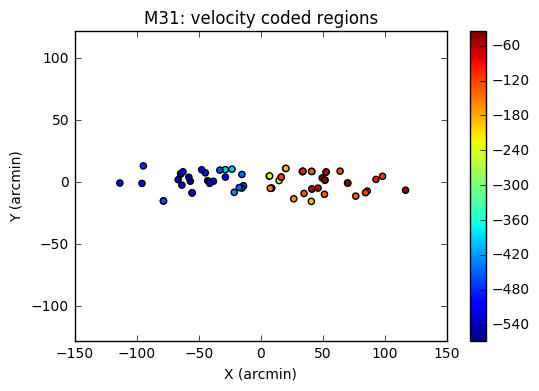

In [7]:
plt.scatter(x,y,c=vobs)
plt.axis('equal')
plt.xlabel('X (arcmin)')
plt.ylabel('Y (arcmin)')
plt.title('M31: velocity coded regions')
plt.colorbar()

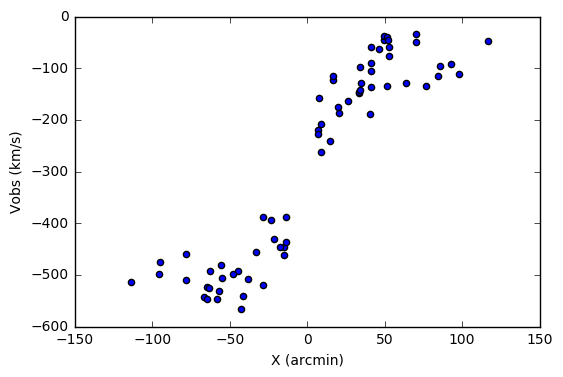

In [8]:
plt.scatter(x,vobs)
plt.xlabel('X (arcmin)')
plt.ylabel('Vobs (km/s)');

-150.0 150.0 -600.0 0.0


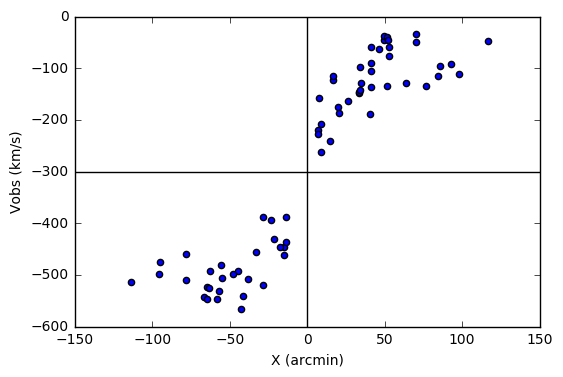

In [10]:
plt.scatter(x,vobs)
plt.xlabel('X (arcmin)')
plt.ylabel('Vobs (km/s)')
#
xmin,xmax = plt.xlim()
vmin,vmax = plt.ylim()
plt.xlim(xmin,xmax)
plt.ylim(vmin,vmax)
print(xmin,xmax,vmin,vmax)
plt.plot([xmin,xmax],[-300,-300],c='black')
plt.plot([0,0],[vmin,vmax],c='black');

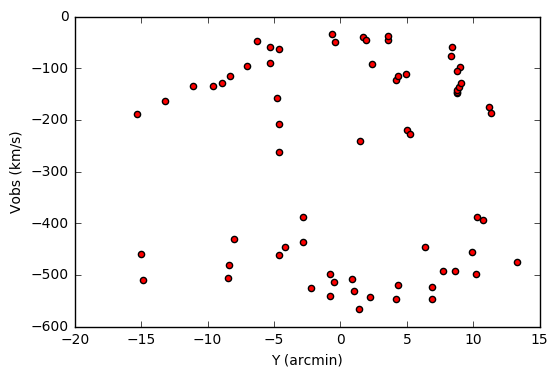

In [11]:
plt.scatter(y,vobs,c='r')
plt.xlabel('Y (arcmin)')
plt.ylabel('Vobs (km/s)');

The figure has X along the major axis, and Y along the minor axis, but these are rotated along the sky, because the position angle of the galaxy is not 90 degrees.


![regions](m31-chart.png)

In [17]:
#    literature values
pa = 32.0           # 0 means north up, positive is counting east (counter clock wise)
inc = 77.0          # 90 is edge on, 0 is face on
vsys = -300.0       # systemic velocity in km/s
distance = 690.0    # distance in kpc

# for fun : the infall time would be:  time = distance / speed
time = (distance * 3e21) / (vsys * 1e5) / (365*24*60*60 * 1e9)      # in Gyr
print(time)

-2.1879756468797567


Now produce the same plot rotated how it should look on the sky and compare with the figure we took from the published paper.

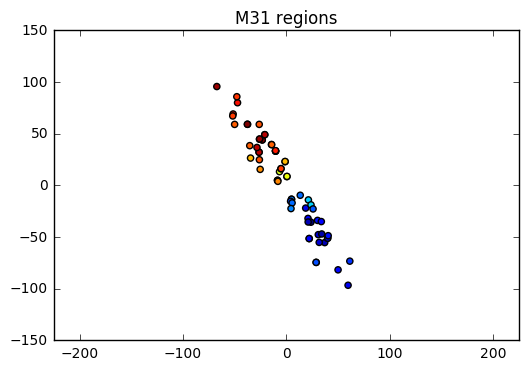

In [18]:
# useful constants for a rotation matrix
cosp = np.cos(pa * np.pi/180.0)
sinp = np.sin(pa * np.pi/180.0)
# rotate all the (x,y) coordinates......bad wrong
x_sky = -sinp * x + cosp * y
y_sky =  cosp * x + sinp * y
# plot
plt.scatter(x_sky,y_sky,c=vobs)
plt.axis('equal')
plt.title('M31 regions');

Now produce the rotation speed, assuming all measurements are from the same plane and are on circular orbits, as function of a deprojected X. This would be rotation curve on both the negative and positive X' axis.

$$
    V_{obs} = V_{sys} + V_{rot} * \sin{i} * \cos{\Theta}
$$
where
$$
    \tan{\Theta} = {\tan{\phi} \over \cos{i}}
$$
with $\Theta$ is in the plane of the galaxy, and $\phi$ in the plane of the sky.


In [19]:
# useful de-projection factors
cosi = np.cos(inc*np.pi/180.0)
sini = np.sin(inc*np.pi/180.0)
# (x,y) are along sky major and minor axis
# (xs,ys) are in the disk of M31
xs = x
ys = y/cosi
tan_t = ys/xs
t = np.arctan2(ys,xs)*180.0/np.pi
cos_t = 1.0/np.sqrt(1+tan_t*tan_t)
vrots = (vobs-vsys) / cos_t / sini
rs = np.sqrt(xs*xs + ys*ys) * np.sign(xs)
#

Before going on, let us spot check the first line from the table

      (2)  (3)   (4)  (5)  (6)  (7)  (8)  (9)
    +14.8 +1.5  16.2 24.5 -241  1.8  66   11

to confirm columns 4,5 and 8 that were derived from columns 2, 3 and 6.

Notice though we've defined a variable **k**, instead of hard coding it for the first line. Useful for debugging.


In [20]:
k=0
print("Checking table1 for region %d: " % (k+1))
print(x[k],y[k],rs[k],t[k],vobs[k],vrots[k])

Checking table1 for region 1: 
14.8 1.5 16.2327997373 24.2538725979 -241.0 66.414023921


-150.0 150.0 -400.0 500.0


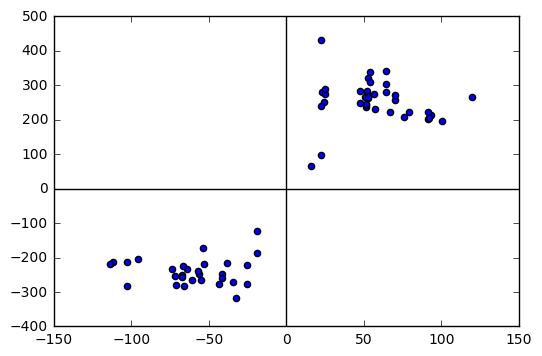

In [21]:
plt.scatter(rs,vrots)
#
xmin,xmax = plt.xlim()
vmin,vmax = plt.ylim()
plt.xlim(xmin,xmax)
plt.ylim(vmin,vmax)
print(xmin,xmax,vmin,vmax)
plt.plot([xmin,xmax],[0,0],c='black')
plt.plot([0,0],[vmin,vmax],c='black');

Fold it over, and plot a single rotation curve as function of radius. Convert the radius to kpc from the original arcmin based on the distance.

In [22]:
vrot = np.abs(vrots)
r = np.abs(rs)

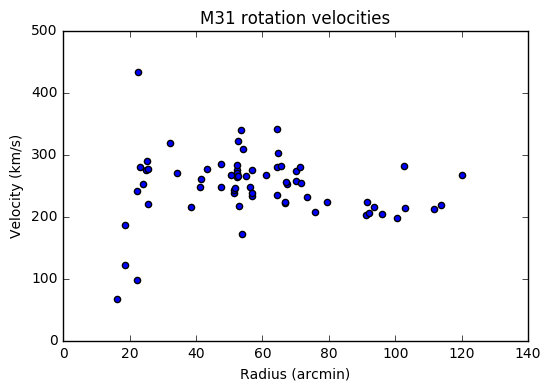

In [23]:
plt.scatter(r,vrot)
plt.title("M31 rotation velocities")
plt.xlabel("Radius (arcmin)")
plt.ylabel("Velocity (km/s)");

Notice that there are no emission regions in the inner parts, below 15 arcmin or so. This was also noted in the paper.

### Epilogue 

If you want to read a historic followup on the M31 work, see this paper by M.S. Roberts titled ["*M 31 and a Brief History of Dark Matter*"](http://adsabs.harvard.edu/abs/2008ASPC..395..283R)
